In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
#
from Calculations_Functions import proportions_from_filename, metrics_table
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

# Tuning Simulations Comparison per Parameter

In [2]:
filename1 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_025_ratio_0_2_sv_5.zarr'
filename2 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_02_ratio_0_1_sv_5.zarr'
filename3 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_1_sv_5.zarr'
###########
filenameAD1 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_1_sv_5_AD_0_052.zarr'
filenameAD2 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_1_sv_5_AD_0_024.zarr'
filenameAD3 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_065_sv_5_AD_0_052.zarr'
filenameAD4 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_08_sv_5_AD_0_052.zarr'
filenameAD5 = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_2_sv_5_AD_0_052.zarr'

Particle Count in Water Column

In [105]:
C_values = [15083, 19716, 33191, 33850, 31996, 33260, 33532, 34413]

Decay Time (Tau)

In [106]:
dt_tau = [0.45, 0.52, 0.82, 0.84, 0.78, 0.8, 0.81, 0.89]

Parameters and Metrics

In [5]:
#### Filename1 ####
run_filename1 = proportions_from_filename(filename = filename1)
table_filename1  = metrics_table(filename = filename1, plot = False)
#### Filename2 ####
run_filename2 = proportions_from_filename(filename = filename2)
table_filename2  = metrics_table(filename = filename2, plot = False)
#### Filename3 ####
run_filename3 = proportions_from_filename(filename = filename3)
table_filename3  = metrics_table(filename = filename3, plot = False)
#### FilenameAD1 ####
run_filenameAD1 = proportions_from_filename(filename = filenameAD1)
table_filenameAD1  = metrics_table(filename = filenameAD1, plot = False)
#### FilenameAD2 ####
run_filenameAD2 = proportions_from_filename(filename = filenameAD2)
table_filenameAD2  = metrics_table(filename = filenameAD2, plot = False)
#### FilenameAD3 ####
run_filenameAD3 = proportions_from_filename(filename = filenameAD3)
table_filenameAD3  = metrics_table(filename = filenameAD3, plot = False)
#### FilenameAD4 ####
run_filenameAD4 = proportions_from_filename(filename = filenameAD4)
table_filenameAD4  = metrics_table(filename = filenameAD4, plot = False)
#### FilenameAD5 ####
run_filenameAD5 = proportions_from_filename(filename = filenameAD5)
table_filenameAD5  = metrics_table(filename = filenameAD5, plot = False)

Organize :D

In [38]:
labels_section_1 = run_filename1.columns[1:]
values_section_1 = [run_filename1.iloc[-1][1:].values, run_filename2.iloc[-1][1:].values, run_filename3.iloc[-1][1:].values,
                    run_filenameAD1.iloc[-1][1:].values, run_filenameAD2.iloc[-1][1:].values, run_filenameAD3.iloc[-1][1:].values,
                    run_filenameAD4.iloc[-1][1:].values, run_filenameAD5.iloc[-1][1:].values]
#
section_1 = pd.DataFrame(data=values_section_1, columns=labels_section_1)

In [39]:
labels_section_2 = table_filename1.columns[1:5]
values_section_2 = [table_filename1.loc[0].values[1:5], table_filename2.loc[0].values[1:5], table_filename3.loc[0].values[1:5]
                    , table_filenameAD1.loc[0].values[1:5], table_filenameAD2.loc[0].values[1:5], table_filenameAD3.loc[0].values[1:5]
                    , table_filenameAD4.loc[0].values[1:5], table_filenameAD5.loc[0].values[1:5]]
section_2 = pd.DataFrame(data=values_section_2, columns=labels_section_2)

In [40]:
labels_section_3 = table_filename1.columns[-2:]
values_section_3 = [table_filename1.loc[0].values[-2:], table_filename2.loc[0].values[-2:], table_filename3.loc[0].values[-2:]
                    , table_filenameAD1.loc[0].values[-2:], table_filenameAD2.loc[0].values[-2:], table_filenameAD3.loc[0].values[-2:]
                    , table_filenameAD4.loc[0].values[-2:], table_filenameAD5.loc[0].values[-2:]]
section_3 = pd.DataFrame(data=values_section_3, columns=labels_section_3)

In [43]:
colors = ['b', 'g', 'r', 'c', 'm', 'k', 'tab:orange', 'tab:brown']

In [176]:
simulation_labels = [r'$\tau$ = 0.025 Pa, Ratio = 0.2, S.Vel = 5.52 m/hr, Ad. = 0.038', r'$\tau$ = 0.02 Pa, Ratio = 0.1, S.Vel = 5.52 m/hr, Ad. = 0.038',
                     r'$\tau$ = 0.01 Pa, Ratio = 0.1, S.Vel = 5.52 m/hr, Ad. = 0.038', r'$\tau$ = 0.01 Pa, Ratio = 0.1, S.Vel = 5.52 m/hr, Ad. = 0.052', 
                     r'$\tau$ = 0.01 Pa, Ratio = 0.1, S.Vel = 5.52 m/hr, Ad. = 0.024', r'$\tau$ = 0.01 Pa, Ratio = 0.065, S.Vel = 5.52 m/hr, Ad. = 0.052', 
                     r'$\tau$ = 0.01 Pa, Ratio = 0.08, S.Vel = 5.52 m/hr, Ad. = 0.052', r'$\tau$ = 0.01 Pa, Ratio = 0.2, S.Vel = 5.52 m/hr, Ad. = 0.052']

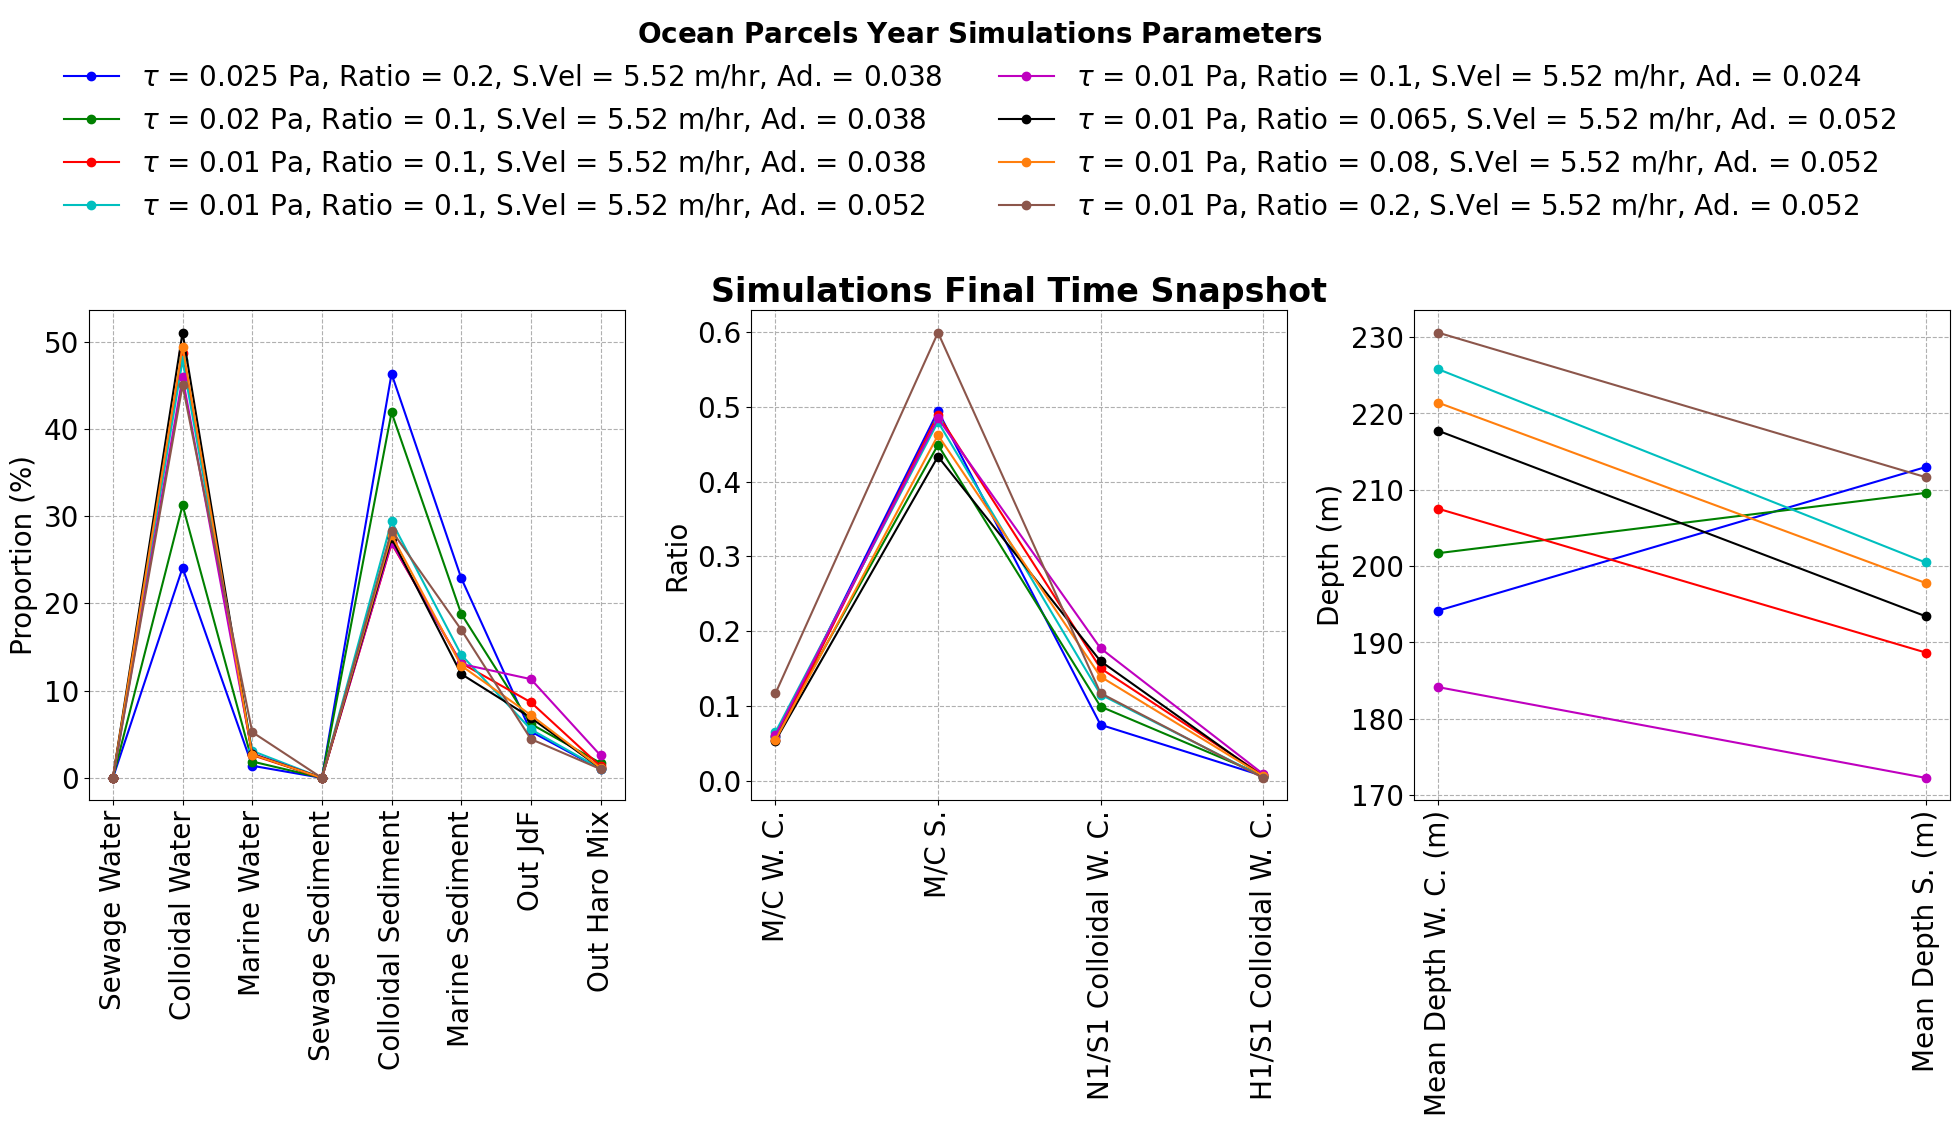

In [133]:
plt.rcParams.update({'font.size': 20})

# Create custom GridSpec: 3 rows, 6 columns
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 3)

# Left
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
#
for i in range(0,len(section_1)):
    ax1.plot(section_1.columns, section_1.iloc[i], '-o', color=colors[i], label = simulation_labels[i])
ax1.grid(linestyle='--')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Proportion (%)')
# Center
for j in range(0,len(section_2)):
    ax2.plot(section_2.columns, section_2.iloc[j], '-o', color=colors[j], label = simulation_labels[j])
ax2.grid(linestyle='--')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Ratio')
ax2.set_title('Simulations Final Time Snapshot', fontweight='bold')
# Right
for k in range(0,len(section_3)):
    ax3.plot(section_3.columns, section_3.iloc[k], '-o', color=colors[k], label = simulation_labels[k])
ax3.grid(linestyle='--')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Depth (m)')
#
fig.legend(
    handles=ax2.lines,
    labels=simulation_labels,
    title=r"$\bf{Ocean\ Parcels\ Year\ Simulations\ Parameters}$",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    frameon=False
)
#
plt.tight_layout(rect=[0, 0, 1, 0.9])


Lets get the year estimates with 30 days pulses:

In [155]:
def plot_cumulative_watercolumn_particles(filename, release_freq, output_res, plot=True):
    # Load data
    data = xr.open_dataset(filename, engine='zarr')
    time = data.time[0, 0].values 
    start_time = pd.to_datetime(time)

    # Count particles in the water column (status 1, 2, or 3)
    go_back = data.status.shape[1]
    number_in_watercolumn = np.zeros(go_back)
    for it in range(go_back):
        positive = data.status[:, it][data.status[:, it] > 0]
        number_in_watercolumn[it] = positive.values[positive.values < 4].shape[0]

    # Create time index
    time_index = pd.date_range(start=start_time, periods=data.time.shape[1], freq=f'{output_res}h')

    # Get number of steps in 30 days
    steps_per_day = int(24 / output_res)
    steps_30_days = 30 * steps_per_day

    # Start with zero and accumulate the pulse
    cumulative = np.copy(number_in_watercolumn)
    for i in range(0, go_back, steps_30_days):
        pulse_len = go_back - i
        cumulative[i:] += number_in_watercolumn[:pulse_len]

    # Theoretical exponential model
    def exp_model(t, C0, time_decay):
        alpha = 1 / (time_decay * 365 * 86400 / (3600 * output_res))
        return C0 * (1 - np.exp(-alpha * t))

    # Fit the model to your data
    tt = np.arange(0, len(data.time[1]))
    popt, pcov = curve_fit(exp_model, tt, cumulative, p0=[1.0, 1.0])
    C0_fit, decay_fit = popt
    y_fit = exp_model(tt, C0_fit, decay_fit)

    # Create output DataFrame
    C = (365 * 86400) / release_freq    
    df_out = pd.DataFrame({
        'goal': y_fit,
        'cumulative': cumulative
    }, index=time_index)
    df_out.index.name = 'datetime'

    # Plotting
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(15, 4))
        ax.plot(df_out.index, df_out['cumulative'], 'b', label='Cumulative Curve (30-day pulse repetition)')
        ax.plot(df_out.index, df_out['goal'], 'k', label=rf'Theoretical Curve ($\tau$ = {decay_fit:.2f} years)')
        ax.set_title('Cumulative Water Column Particles vs Theoretical Curve')
        ax.set_xlabel('Time')
        ax.set_ylabel('Particle Count')
        ax.grid()
        ax.legend(loc='upper left', fontsize=12)

        textstr = (
            f"Exponential Fit\n"
            f"C $\\cdot$ (1 - exp(- $\\alpha \\cdot$ t))\n"
            f"\n"
            f"Final Theoretical: {int(y_fit[-1])}\n"
            f"Final Cumulative: {int(cumulative[-1])}\n"
            f"Fitted Expected (C): {int(C0_fit)}\n"
            f"Expected Amount = {int(C)}\n"
            f"Fitted Decay Time ($\\tau$) = {decay_fit:.2f} years"
        )
        ax.text(0.87, 0.05, textstr,
                transform=ax.transAxes,
                fontsize=12,
                verticalalignment='bottom',
                horizontalalignment='right',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), ha='center')

    return df_out

In [169]:
C_simulations = [plot_cumulative_watercolumn_particles(filename=filename1, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filename2, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filename3, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD1, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD2, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD3, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD4, release_freq=900, output_res=6, plot=False)['cumulative'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD5, release_freq=900, output_res=6, plot=False)['cumulative'].values]
#
C_simulations_fitted = [plot_cumulative_watercolumn_particles(filename=filename1, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filename2, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filename3, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD1, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD2, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD3, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD4, release_freq=900, output_res=6, plot=False)['goal'].values,
                 plot_cumulative_watercolumn_particles(filename=filenameAD5, release_freq=900, output_res=6, plot=False)['goal'].values]
times = plot_cumulative_watercolumn_particles(filename=filename1, release_freq=900, output_res=6, plot=False)['cumulative'].index

In [ ]:
sim_labels = ['Sim 1', 'Sim 2', 'Sim 3', 'Sim 4', 'Sim 5', 'Sim 6', 'Sim 7', 'Sim 8']

[15083, 19716, 33191, 33850, 31996, 33260, 33532, 34413]

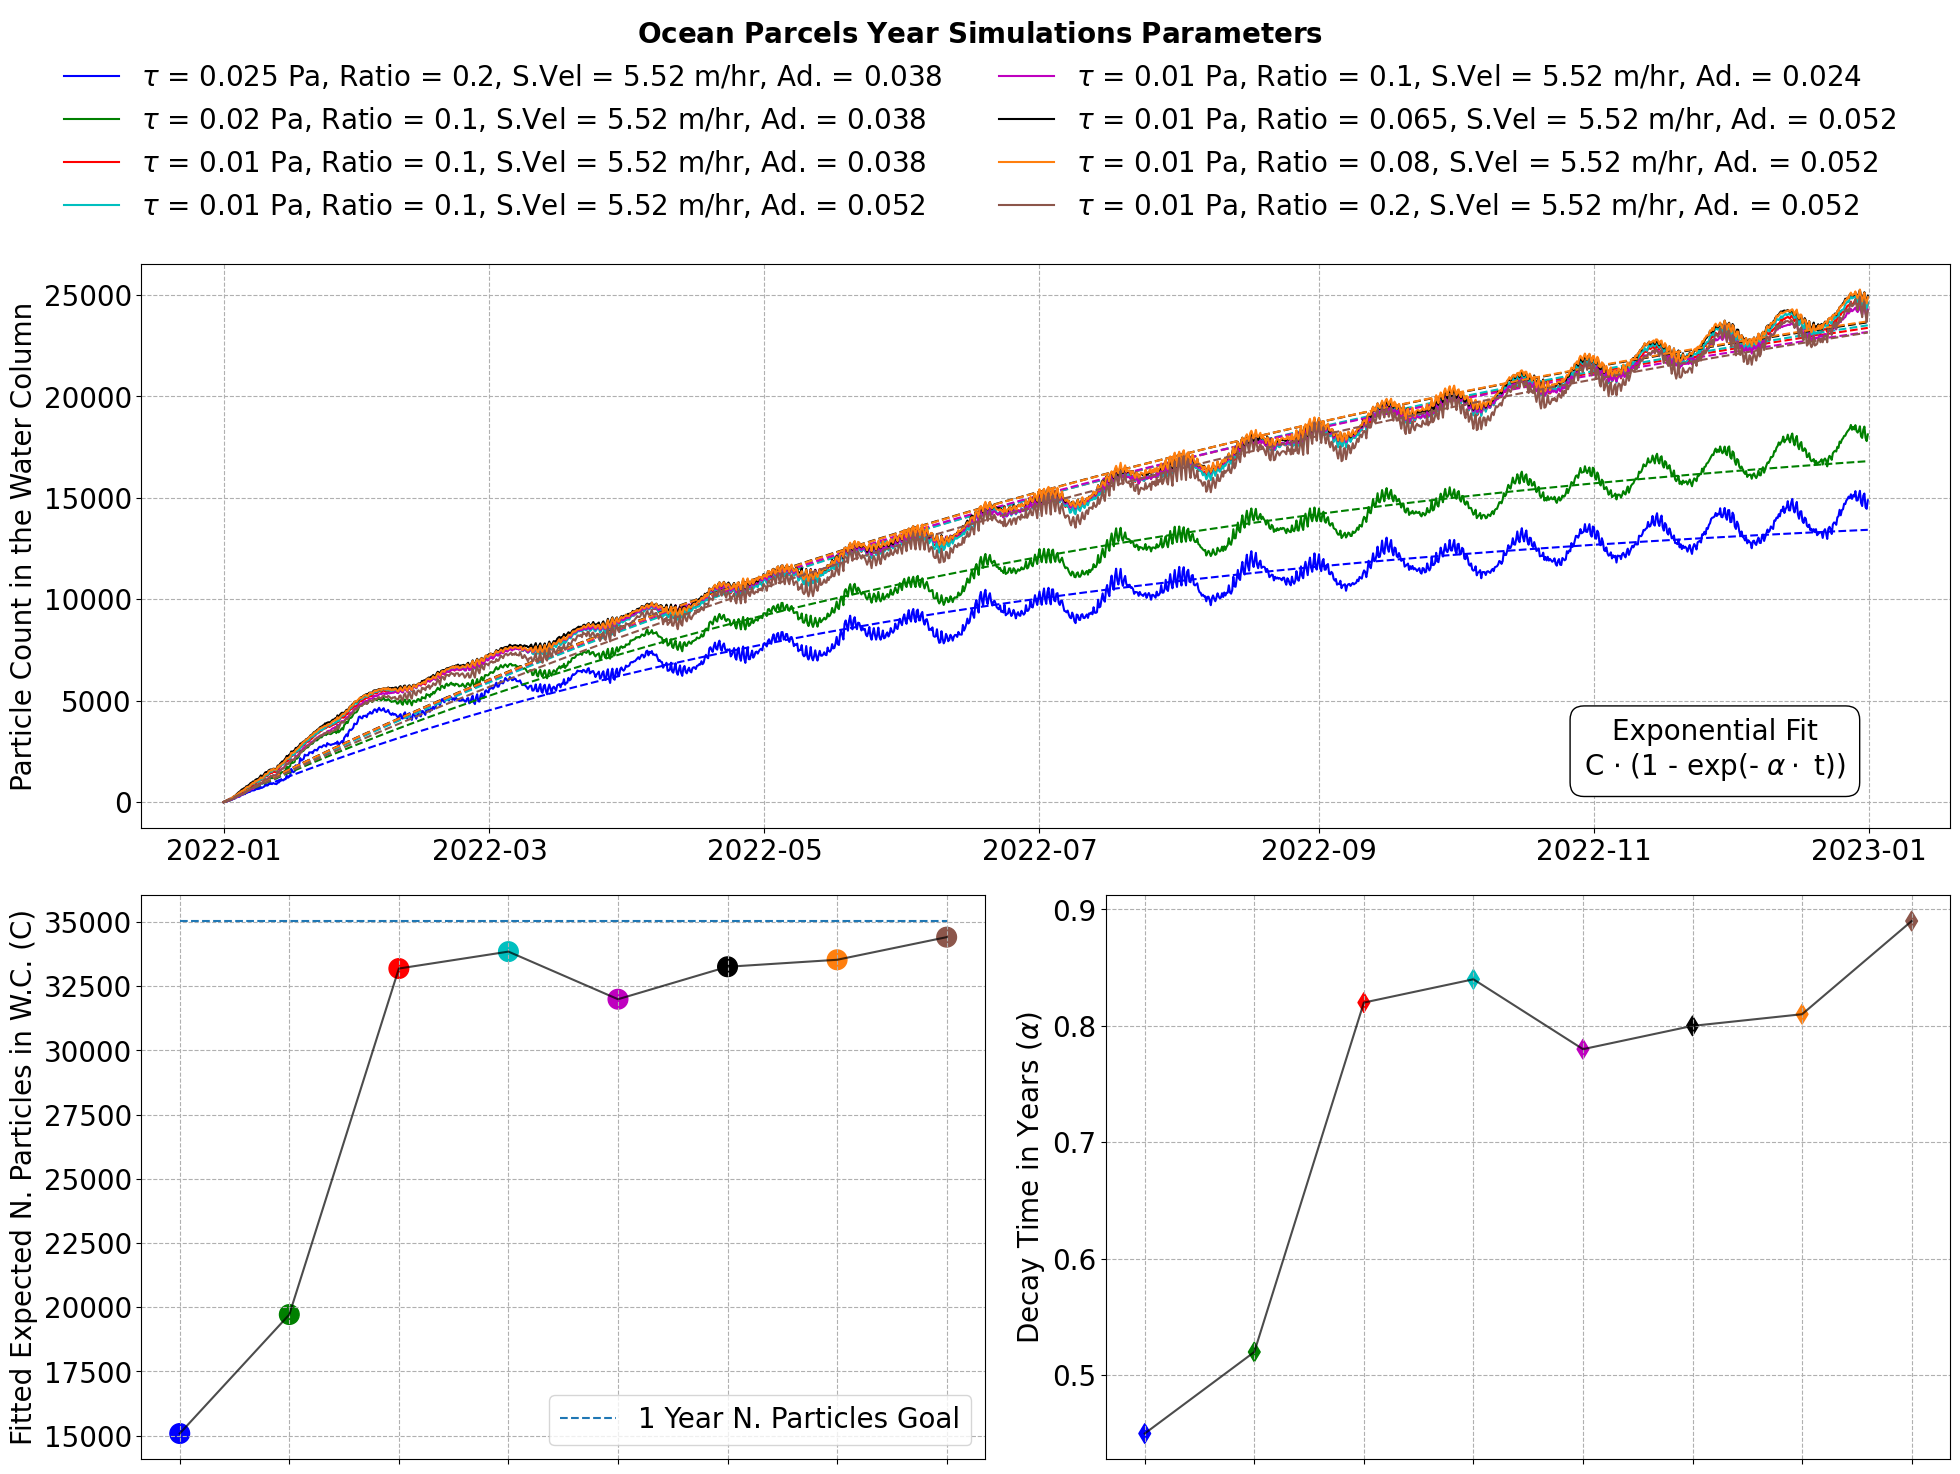

In [210]:
fig = plt.figure(figsize=(20, 14))
gs = gridspec.GridSpec(2, 2)

# Left
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
#
lines_handle =[]
for n in range(0, len(C_simulations)):
    lines = ax1.plot(times, C_simulations[n], color = colors[n])[0]
    ax1.plot(times, C_simulations_fitted[n], '--', color = colors[n])
    lines_handle.append(lines)
ax1.grid(linestyle='--')  
ax1.set_ylabel('Particle Count in the Water Column')
#
textstr = (
    f"Exponential Fit\n"
    f"C $\\cdot$ (1 - exp(- $\\alpha \\cdot$ t))"
)
ax1.text(0.87, 0.08, textstr,
        transform=ax1.transAxes,
        fontsize=20,
        verticalalignment='bottom',
        horizontalalignment='right',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), ha='center')
#
#  
ax2.plot(np.arange(0,len(C_values)), C_values, color='k', alpha = .7)
ax2.scatter(np.arange(0,len(C_values)), C_values, color=colors, s=200)
ax2.grid(linestyle='--')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Fitted Expected N. Particles in W.C. (C)')
ax2.hlines(y=(365 * 86400) / 900, xmin=0, xmax=7, linestyle ='--', label = '1 Year N. Particles Goal')
ax2.legend()
ax2.tick_params(labelbottom=False)
#
ax3.plot(np.arange(0,len(dt_tau)), dt_tau , color='k', alpha = .7)
ax3.scatter(np.arange(0,len(dt_tau)), dt_tau, color=colors, s=100, marker='d')
ax3.grid(linestyle='--')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel(r'Decay Time in Years ($\alpha$)')
ax3.tick_params(labelbottom=False)
#
#
fig.legend(
    handles=lines_handle,
    labels=simulation_labels,
    title=r"$\bf{Ocean\ Parcels\ Year\ Simulations\ Parameters}$",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.07),
    ncol=2,
    frameon=False
)
#
plt.tight_layout(rect=[0, 0, 1, 0.9])